# Aula 05 - Exercício 04

### Alunos:
 - Alexandre Batistella Bellas, 9763168
 - Moisés Botarro Ferraz Silva, 8504135

## Perceptron e Data augmentation 
Neste exercicio utilizaremos o classificador Perceptron para classificar dois dígitos. No código abaixo os dois digitos são carregados e exibidos lado a lado.

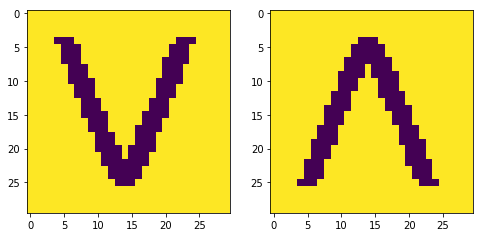

In [2]:
from skimage.io import imread
from matplotlib import pyplot as plt

# Lendo as duas imagens originais
V = imread("V.png", as_gray=True)
V_inv = imread("inv_V.png", as_gray=True)

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show(True)



---

- Dado o código acima, aplique ruído (random_noise) no primeiro símbolo e rotacione (transform.rotate) em 25º o segundo símbolo antes de exibi-los.
  - Dica: Para o `random_noise` utilize parametro `mode='pepper' ` e  para `transform.rotate` utilize `preserve_range=True, mode='constant', cval=1`

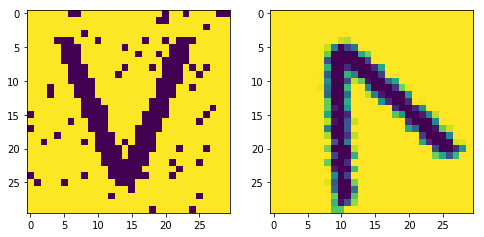

In [3]:
from skimage.util import random_noise
from skimage import transform

V_noised = random_noise(V, mode='pepper')
V_inv_rotated = transform.rotate(V_inv, angle=25, preserve_range=True, mode='constant', cval=1)

fig = plt.figure(figsize=(8, 8))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V_noised)

fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv_rotated)
plt.show(True)



---

- Agora defina a função `gen_data` abaixo. A função recebe como parâmetros: uma imagem base (v ou v invertido), a quantidade de dados artificiais a serem gerados, a classe da imagem base passada e uma lista de dados e labels. A função deve concatenar (`append`) as imagens geradas na lista `data` e suas respectivas classes na lista `target`.

  - Dica: Utilize a função `random.uniform(-a, a)` para gerar valores aleatórios entre -a e a para criar angulos de rotação variados.
  - Dica: Utilize valores diferentes para o parâmetro `seed` do random_noise para produzir resultados diferentes

In [4]:
import random

random.seed(2) # Make sure that the runnings are reproductible

def gen_data(base_image, quantity, label, data, target):
  #Defina a função aqui
    for i in range(quantity):
        if i%2 == 0:
            data.append(random_noise(base_image, mode='pepper', seed=random.randint(1,100000)))
        else:
            data.append(transform.rotate(base_image, angle=random.uniform(-25,25), preserve_range=True, mode='constant', cval=1))
        target.append(label)



---


- Edite a linha abaixo do comentário para exibir uma imagem 4x4 do dataset criado acima.

/opt/anaconda/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


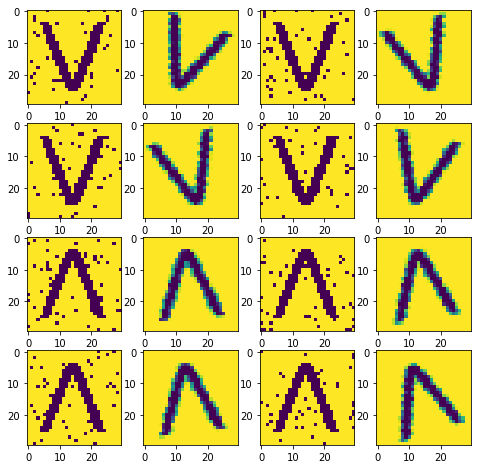

In [5]:
import numpy as np

x = []
y = []

gen_data(V, 8 , 0, x, y)
gen_data(V_inv, 8, 1, x, y)
x = np.asarray(x)
y = np.asarray(y)
############################

# Printar dataset inteiro em uma grid (4x4)

fig = plt.figure(figsize=(8, 8))
rows, columns = 4, 4

for r in range(rows):
    for c in range(columns):
        fig.add_subplot(rows, columns, (columns*r+c)+1)
        plt.grid(False)
        plt.imshow(x[r*columns+c])
        
fig.show(True)



---

- Separe o dataset criado em 12 imagens de treinamento e 4 imagens de teste utilizando a função `train_test_split`. Depois treine um classificador do tipo Perceptron no conjunto de treino. Calcule a acurácia para os conjuntos de treino e teste.

  - Dica: Você deve transformar as dimensões do conjunto de entrada para utilizar o Perceptron. Uma observação do conjunto é uma matriz 30x30. Para aplicar essa matriz no perceptron, você deve transformá-la em um vetor com 30x30 =900 elementos. Para isso utilize a função reshape da biblioteca numpy para transformar o conjunto x por inteiro.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Reshape - flattening (melhor fazer antes de separação dos dados em teste-treino)
x_reshaped = []
for i in range(len(x)):
    x_reshaped.append(np.reshape(x[i], 900))
        
# Separação dos dados
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=4, shuffle=True, random_state=10)
print("%d imagens de treinamento e %d imagens de teste" % (len(x_train), len(x_test)))

# Utilização do Perceptron 
perceptron = Perceptron(tol=1e-3, random_state=10)
perceptron.fit(x_train, y_train)

# Acurácia (tem a do próprio modelo, mas vamos usar accuracy_score)
print("---- Accuracy ----")
print("training: accuracy %d" % accuracy_score(y_train, perceptron.predict(x_train)))
print("test: accuracy %d" % accuracy_score(y_test, perceptron.predict(x_test)))

12 imagens de treinamento e 4 imagens de teste
---- Accuracy ----
training: accuracy 1
test: accuracy 1


Percebe-se, analisando o valore de acurácia para o conjunto de treinamento, que o Perceptron foi capaz de classificar corretamente todos os elementos desse conjunto.

O valor elavado para a acurácia do conjunto de treinamento é esperado uma vez que o modelo foi treinado exatamente com esse conjunto de dados e ele deve, portanto, apresentar um baixo erro para classificá-lo.



---

Devido à natureza da função threshold, podemos ter uma falsa sensação de quê nosso classificador classifica os exemplos com a mesma confiança. Porém, isso não é verdadeiro. No caso do perceptron utilizado, podemos ter uma medida da confiança do classificador para um dado exemplo calculando a distância relativa desse exemplo para o hiperplano separador. Essa medida pode ser obtida através da função `decision_function(X)`

- Utilize a função  `decision_function(X)` para calcular a distância dos exemplos query0.png ~ query4.png ao hiperplano separador do classificador treinado no item anterior e analise a relação entre distância x confiança x qualidade do símbolo na imagem.

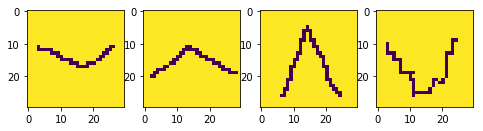

In [7]:
# Modelo só saí 0 ou 1. Se tiver incerteza, ele não saíra 0.6 ou 0.4 (porcentagem de certeza). decision_function()
# nos mostra distância do ponto ao hiperplano separador, dando uma medida da confianca da classificação e qualidade
# do símbolo. (Por quê um símbolo de má qualidade influencia nessa distância e na acurácia do classificador?)

queries = []
for i in range(5):
    if i==3: # query3.png is missing
        continue
    queries.append(imread(("query%d"%i) + ".png", as_gray=True))
    
    
rows = 1
columns = 4
fig = plt.figure(figsize=(8,8))

for q, i in zip(queries, range(1,5)):
    fig.add_subplot(rows, columns, i)
    plt.grid(False)
    plt.imshow(q)
plt.show()

In [8]:
x = np.asarray(queries)
y = np.asarray([0, 1, 1, 0])

# Flattening test data
x_reshaped = [np.reshape(q, 900) for q in queries]

y_predict = perceptron.predict(x_reshaped)
print("classes esperadas %s" % y)
print("classes preditas  %s" % y_predict)

classes esperadas [0 1 1 0]
classes preditas  [0 1 1 0]


In [9]:
print("------ Distância ao Hiperplano ------")
print("dados originais de teste %s" % perceptron.decision_function(x_test))
print("novos dados de teste     %s" % perceptron.decision_function(x_reshaped))

------ Distância ao Hiperplano ------
dados originais de teste [-12.68428255 -11.30461919  70.01979938 -64.88652773]
novos dados de teste     [-7.46369842  5.85118997 32.728862   -8.96753542]


Embora o modelo tenha sido capaz de classificar corretamente as novas figuras, repare que a distância ao hiperplano de cada uma delas diminuiu consideravelmente em relação ao conjunto original de teste.

As figuras 1, 2 e 4 ficaram bem próximas ao plano, o que reflete uma confiança menor do modelo para tal classificação. Analisando as imagens, é possível observar que a qualidade delas tem uma forte influência nesse resultado pois são os casos que mais fogem do padrão do conjunto de dados utilizado para o treinamento do Perceptron.

A figura 3 é a mais próxima ao conjunto dos dados de treinamento, o que reflete na sua maior distância ao hiperplano, indicando uma maior certeza do perceptron para classificá-la devido à sua melhor qualidade.